# Reeb Graph Matching
#### Implementing 'Topology Matching for Fully Automatic Similarity Estimation of 3D Shapes'
#### http://graphics.stanford.edu/courses/cs468-08-fall/pdf/Hilaga01.pdf
#### (Hilaga et al., 2001)

In [1]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csd_functions
import scipy
import networkx as nx
import reeb_matching
from copy import deepcopy
sns.set()


Load tree data

In [5]:
prefix = 'gbarEvPyrAmpa_sweep'

data_dir = os.path.abspath('../lfp_reeb_github/data')
name = 'gbarEvPyrAmpa_sweep21'
node_points, node_connectivity = reeb_matching.load_tree(data_dir,prefix,name)


Compute multiresoluion reeb graph

In [6]:
%matplotlib qt
G = nx.Graph()
G.add_edges_from(node_connectivity)

node_attributes = {node_id : {'Position' : node_points[node_id,:], 'Visited' : 0, 'Merged':[],'Inserted':[],'New_Merge':[]} for node_id in list(G.nodes)}
nx.set_node_attributes(G,node_attributes)

interval_dict = reeb_matching.compute_intervals(node_points, 8)

seed_node = list(G.nodes)[1]
reeb_matching.graph_search(G, seed_node, interval_dict,0)
reeb_matching.plot_graph(G)

G.clear()

KeyError: 3149

Compute Similarity 

In [7]:
data_dir = os.path.abspath('../lfp_reeb_github/data')
prefix = 'gbarEvPyrAmpa_sweep'

s_dir = data_dir + '/' + prefix + '/' + 'skeleton/'
file_list = reeb_matching.get_skeleton_names(s_dir) # only first two for now

file_list

resolution_list = [8,4,2]

similarity_matrix, MPAIR_list = reeb_matching.tree_sim_matrix(file_list, resolution_list, data_dir, prefix)


KeyError: 3149

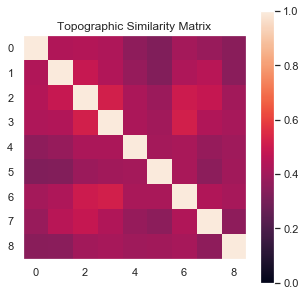

In [6]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid',{'axes.grid' : False})
plt.imshow(similarity_matrix,vmin=0, vmax=1)
plt.title('Topographic Similarity Matrix')
plt.colorbar()
plt.show()

In [7]:
file_list

array(['input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_0',
       'input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_1',
       'input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_2',
       'input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_0',
       'input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_1',
       'input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_2',
       'input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_0',
       'input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_1',
       'input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_2'],
      dtype='<U68')

In [8]:
prefix = 'input_strength032320'

#Preparing directory
s_dir = 'D:/Jones_Lab/hnn_params/' + prefix + '/' +  prefix + '_skeleton/'
d_dir = 'D:/Jones_Lab/hnn_params/' + prefix + '/' +  prefix + '_data/'

names = file_list

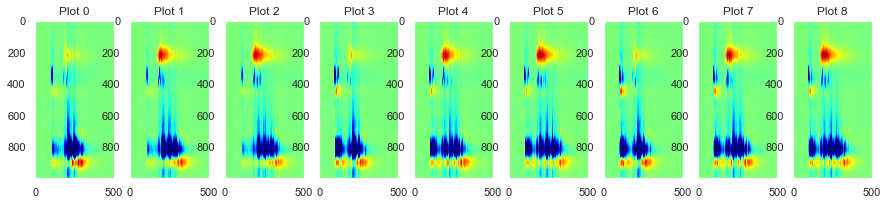

In [9]:
plt.figure(figsize=(15,50))
for plt_idx in range(len(names)):
    plot_name = names[plt_idx]
    plt.subplot(1,9,plt_idx+1)
    csd_surface_df = pd.read_csv(d_dir + plot_name + '.csv', sep=',')
    surface_points = np.array(csd_surface_df) 
    Z_hnn = csd_functions.points2grid(surface_points)
    plt.imshow(Z_hnn, interpolation='none', origin='upper', cmap='jet_r',vmin=Z_hnn.min(), vmax=-Z_hnn.min())
    plt.title('Plot ' + str(plt_idx))